In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 -4*x +5

In [5]:
f(3.0)

20.0

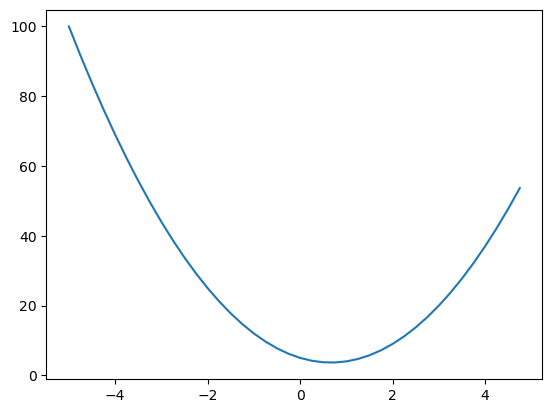

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [7]:
h  = 0.00001
x = 2/3.0
(f(x+h) - f(x) )/h

3.0000002482211127e-05

In [8]:
# more complex
a = 2.0
b = -3.0
c = 10.0
d  = a*b+c
d

4.0

In [9]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0


d1  = a*b+c
c += h
d2 = a*b +c

print(d1,"this is d1")
print(d2, "this is d2")
print("slope", (d2 -d1)/h)

4.0 this is d1
4.0001 this is d2
slope 0.9999999999976694


In [15]:
class Value:
    def __init__(self, data, _children = (), _op='', label=''):
        self.data = data
        self._backward =lambda: None
        self.grad = 0.0
        self._prev = set(_children)
        self._op =_op
        self.label = label
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 *out.grad
            other.grad += 1.0 *out.grad    
        out._backward  = _backward
        
        return out
        
    def __rmul__(self, other):
        return self * other
    
    
    
    def __mul__(self, other):
        other = other if isinstance(other,Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward  = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) -1) / (math.exp(2*n) +1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1- t**2)  * out.grad
            
        out._backward  = _backward
        return out 
    
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data  *out.grad
        out._backward  = _backward
        return out
    
    
    def __truediv__(self, other):
        return self * other**-1        
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float instances for now"
        out = Value(self.data **other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other * (self.data **(other -1)) * out.grad
        out._backward  = _backward
        return out
        
        
    def __neg__(self):
        return self * -1
    
    def __sub__(self, other):
        
        return self + (-other) 
    
    
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        topo
        self.grad =  1.0
        for node in reversed(topo):
            node._backward()

        
    


In [16]:
a = Value(3.0)
# print(a.exp())
b = Value(5.0)
print(a-b)

Value(data=-2.0)


In [11]:
from graphviz import Digraph


def trace(root):
  # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
        # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [26]:
#how to naviagte faster
f.grad= 4.0


AttributeError: 'float' object has no attribute 'grad'

In [27]:
draw_dot(L)

NameError: name 'L' is not defined

In [30]:
e.grad = -2.0
c.grad  = -2.0 
a.grad= (-2.0 * -3)
b.grad = (-2.0 *2)

NameError: name 'e' is not defined

In [31]:
a.data += 0.01 *a.grad
b.data += 0.01 *b.grad
c.data += 0.01 *c.grad
f.data += 0.01 *f.grad

#this is effectively the forward pass
#we expect the L to go up
e = a * b
d = e + c
L =  d*f
print(L.data)

AttributeError: 'float' object has no attribute 'data'

In [ ]:
# dL/da = ?
# = dL/de * de/da
# e = a*b --->de/da = b 

In [ ]:
L.grad =1

d = c+e #differentiate d with repsect to c and it gives you zero
#dd/dc = ?
#dd/de  = 0

dl/dc =  dd/dc * dl/dd

In [29]:
draw_dot(L)

NameError: name 'L' is not defined

In [ ]:
3**3
2*2 

In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid()

In [17]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron #weights are synaptic strengths for each neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

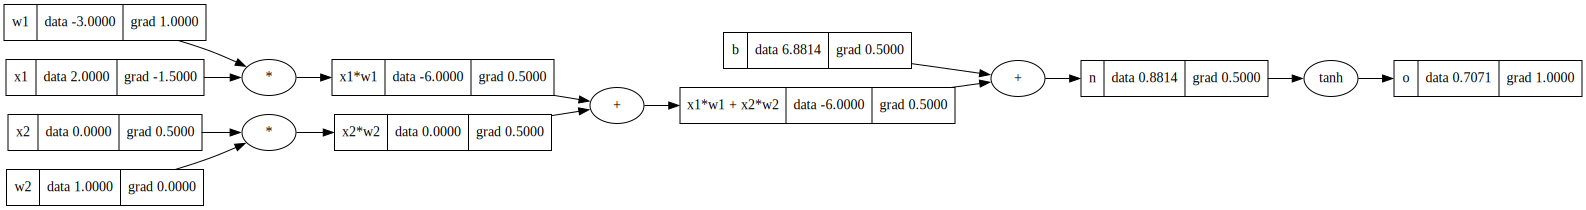

In [18]:
draw_dot(o)

In [48]:
o.backward()

In [ ]:
o.grad =  1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
    for child in v._prev:
        build_topo(child)
    topo.append(v)
build_topo(o)
topo

for node in reversed(topo):
    node._backward()
   
#automates calling the backward function 

In [ ]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
    for child in v._prev:
        build_topo(child)
    topo.append(v)
build_topo(o)
topo

In [36]:
o.grad = 1.0


In [37]:
o._backward()

In [38]:
n._backward()

In [ ]:
x1w1x2w2._backward() 

In [ ]:
x1w1._backward()

In [ ]:
x2w2._backward()

In [ ]:
x2.grad = x2w2.grad * w2.data
w2.grad = x2w2.grad * x2.data

In [ ]:
x1.grad = w1.data  * x1w1.grad
w1.gard = x1.data  * x1w1.grad

x1w1x2w2.grad = 0.5
b.grad = 0.5
x1w1.grad = 0.5
x2w2.grad = 0.5

In [ ]:
n.grad = 0.5

In [ ]:
o.grad = 1.0
1-o.data**2


In [ ]:
#o  = tanh (n) #what is do/dn  = 1- tnah(n)**2
#but we already have tanh of n so the expression simplfies to 1-o**2

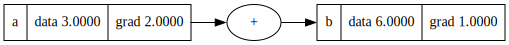

In [43]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)
#of course this works in forward order

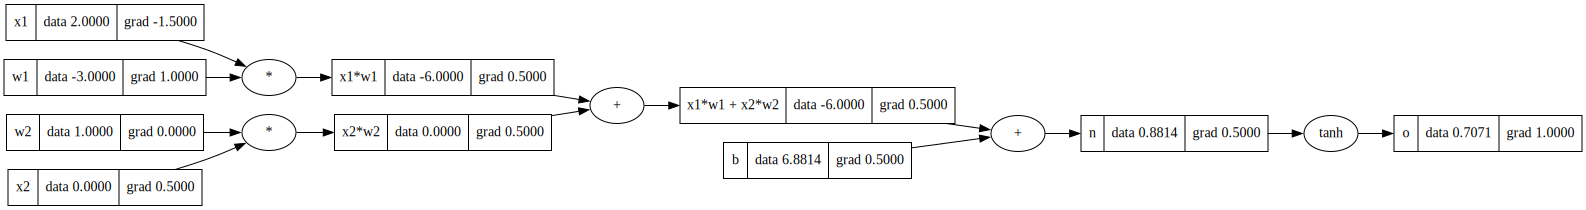

In [51]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

#o.backward()

draw_dot(o)

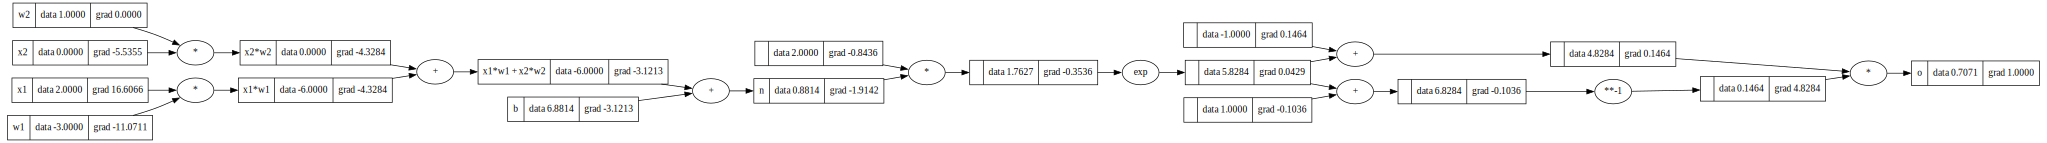

In [19]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron #weights are synaptic strengths for each neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
#
e = (2*n).exp()
o  = (e-1)/ (e+1)
#

o.label = 'o'
o.backward()
draw_dot(o)